**Target Variable(s): Executive Function Scores**

1. Interference
2. Working Memory
3. Cognitive Flexibility

# Data Import + Wrangling

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = pd.ExcelFile('/Users/springboard/Desktop/Springboard-Coursework/Obesity.xlsx')

df = data.parse('Full sample_EF_excel')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 25 columns):
Reference_no              513 non-null int64
Actual_age_C              513 non-null float64
Sex                       513 non-null int64
Weight                    513 non-null float64
Height_meter              513 non-null float64
BMI                       513 non-null float64
BMI_for_age               513 non-null float64
Physical_fitness_score    513 non-null float64
PFS_CAT                   513 non-null int64
Breakfast                 513 non-null int64
Lunch                     513 non-null int64
Dinner                    513 non-null int64
PA_total_score            513 non-null float64
PA_CAT                    513 non-null int64
Sleep_weekdays            513 non-null float64
Sleep_weekend             513 non-null float64
Sleep_percent             513 non-null float64
Global_sleep_CAT          513 non-null int64
Household_size            486 non-null float64
Income_CAT        

In [4]:
df.head()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
0,1,12.106776,2,30.6,1.420,15.175560,-1.51,54.545455,1,7,...,7.25,95.238095,1,6.0,2.0,3.0,3.0,10.409091,16,18.00
1,2,12.114990,1,33.4,1.492,15.004061,-1.60,62.500000,2,7,...,11.50,95.652174,0,4.0,3.0,4.0,3.0,-2.697183,16,27.00
2,3,12.125941,1,66.8,1.518,28.988979,2.86,55.045872,2,6,...,8.00,91.428571,1,3.0,1.0,3.0,2.0,6.598361,16,4.31
3,4,12.139630,1,40.4,1.466,18.798077,0.53,56.206089,2,7,...,11.00,76.190476,1,4.0,1.0,3.0,4.0,1.454545,15,45.16
4,5,12.167009,2,40.1,1.475,18.431485,0.12,63.829787,2,7,...,11.25,98.876404,0,3.0,1.0,2.0,3.0,0.291339,15,15.07


In [5]:
# Drop duplicate data (if any)

df.drop_duplicates()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
0,1,12.106776,2,30.6,1.4200,15.175560,-1.51,54.545455,1,7,...,7.25,95.238095,1,6.0,2.0,3.0,3.0,10.409091,16,18.00
1,2,12.114990,1,33.4,1.4920,15.004061,-1.60,62.500000,2,7,...,11.50,95.652174,0,4.0,3.0,4.0,3.0,-2.697183,16,27.00
2,3,12.125941,1,66.8,1.5180,28.988979,2.86,55.045872,2,6,...,8.00,91.428571,1,3.0,1.0,3.0,2.0,6.598361,16,4.31
3,4,12.139630,1,40.4,1.4660,18.798077,0.53,56.206089,2,7,...,11.00,76.190476,1,4.0,1.0,3.0,4.0,1.454545,15,45.16
4,5,12.167009,2,40.1,1.4750,18.431485,0.12,63.829787,2,7,...,11.25,98.876404,0,3.0,1.0,2.0,3.0,0.291339,15,15.07
5,6,12.180698,1,53.5,1.6600,19.415009,0.76,56.074766,2,2,...,12.00,70.000000,1,4.0,3.0,4.0,4.0,2.657534,17,24.40
6,7,12.183436,1,31.4,1.4650,14.630339,-1.92,79.207921,3,5,...,9.50,95.238095,0,7.0,1.0,3.0,3.0,5.225806,26,33.00
7,8,12.197125,1,61.4,1.5640,25.101223,2.26,73.394495,3,5,...,6.00,100.000000,1,6.0,3.0,4.0,4.0,0.939394,13,33.96
8,9,12.213552,2,46.4,1.5300,19.821436,0.62,66.666667,3,0,...,10.00,70.422535,1,6.0,3.0,4.0,4.0,-7.417178,16,15.70
9,10,12.213552,2,27.0,1.3990,13.795211,-2.54,58.394161,2,7,...,8.00,100.000000,1,5.0,2.0,3.0,3.0,-3.853659,17,36.99


In [6]:
# Drop 27 rows corresponding to 27 missing values
# Missing values found in 'Household_size', 'Income_CAT', 'Edu_father', and 'Edu_mother'

df_cleaned = df.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 486 entries, 0 to 512
Data columns (total 25 columns):
Reference_no              486 non-null int64
Actual_age_C              486 non-null float64
Sex                       486 non-null int64
Weight                    486 non-null float64
Height_meter              486 non-null float64
BMI                       486 non-null float64
BMI_for_age               486 non-null float64
Physical_fitness_score    486 non-null float64
PFS_CAT                   486 non-null int64
Breakfast                 486 non-null int64
Lunch                     486 non-null int64
Dinner                    486 non-null int64
PA_total_score            486 non-null float64
PA_CAT                    486 non-null int64
Sleep_weekdays            486 non-null float64
Sleep_weekend             486 non-null float64
Sleep_percent             486 non-null float64
Global_sleep_CAT          486 non-null int64
Household_size            486 non-null float64
Income_CAT        

In [7]:
# Summary statistics

df_cleaned.describe()

,Reference_no,Actual_age_C,Sex,Weight,Height_meter,BMI,BMI_for_age,Physical_fitness_score,PFS_CAT,Breakfast,...,Sleep_weekend,Sleep_percent,Global_sleep_CAT,Household_size,Income_CAT,Edu_father,Edu_mother,Interference_score_ALL,WM_total,CF_total
count,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,...,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000,486.000000
mean,256.069959,14.075512,1.604938,51.867695,1.564756,21.004273,0.221049,62.973417,2.267490,4.213992,...,8.771770,82.883973,0.724280,5.462963,1.888889,3.277778,3.277778,1.340364,17.306584,27.630988
std,148.917535,1.322689,0.489368,14.870932,0.080929,5.089657,1.515608,12.155276,0.975183,2.392318,...,2.006336,17.249667,0.447337,1.614901,0.807184,0.577053,0.587674,6.563426,3.762901,19.443671
min,1.000000,12.106776,1.000000,24.200000,1.365000,12.988233,-3.950000,19.543974,1.000000,0.000000,...,2.500000,19.317450,0.000000,2.000000,1.000000,1.000000,1.000000,-20.792857,10.000000,-15.000000
25%,127.250000,12.985626,1.000000,41.600000,1.508125,17.328972,-0.885000,55.813953,2.000000,2.000000,...,7.500000,74.074074,0.000000,4.000000,1.000000,3.000000,3.000000,-2.850857,15.000000,14.392500
50%,256.500000,13.655031,2.000000,48.800000,1.558500,19.850710,0.235000,60.913706,2.000000,4.000000,...,9.000000,87.500000,1.000000,5.000000,2.000000,3.000000,3.000000,0.946207,17.000000,23.000000
75%,385.750000,15.482546,2.000000,58.950000,1.618625,23.462314,1.267500,69.114578,3.000000,7.000000,...,10.000000,96.774194,1.000000,6.000000,3.000000,4.000000,4.000000,5.245677,19.000000,36.207500
max,513.000000,16.970000,2.000000,117.500000,1.875000,42.743375,4.160000,126.315789,5.000000,7.000000,...,14.000000,101.818182,1.000000,12.000000,3.000000,4.000000,4.000000,27.471264,30.000000,136.620000


# Inferential Statistics

In [8]:
import numpy as np
import scipy.stats as stats

In [9]:
# Means of EF Scores

INT_mean = np.mean(df_cleaned['Interference_score_ALL'])
print('Interference Score Mean = ' + str(INT_mean))

WM_mean = np.mean(df_cleaned['WM_total'])
print('Working Memory Score Mean = ' + str(WM_mean))

CF_mean = np.mean(df_cleaned['CF_total'])
print('Cognitive Flexibililty Score Mean = ' + str(CF_mean))

Interference Score Mean = 1.3403639929392468
Working Memory Score Mean = 17.30658436213992
Cognitive Flexibililty Score Mean = 27.630987654320986


**Sex vs. EF Scores (2)**

- Interference

$H_{o}$: $μ_{male}$ = $μ_{female}$

$H_{a}$: $μ_{male}$ != $μ_{female}$

- Working Memory

$H_{o}$: $μ_{male}$ = $μ_{female}$

$H_{a}$: $μ_{male}$ != $μ_{female}$

- Cognitive Flexibilty

$H_{o}$: $μ_{male}$ = $μ_{female}$

$H_{a}$: $μ_{male}$ != $μ_{female}$

α = 0.05

In [10]:
# Two-Sample T-Tests - Male vs. Female

male = df_cleaned[df_cleaned['Sex']==1]
female = df_cleaned[df_cleaned['Sex']==2]

## Interference

sex_INT = stats.ttest_ind(male['Interference_score_ALL'], female['Interference_score_ALL'], equal_var=True)
print(sex_INT)

## Working Memory

sex_WM = stats.ttest_ind(male['WM_total'], female['WM_total'], equal_var=True)
print(sex_WM)


## Cognitive Flexibility

sex_CF = stats.ttest_ind(male['CF_total'], female['CF_total'], equal_var=True)
print(sex_CF)

Ttest_indResult(statistic=0.5966053029252087, pvalue=0.5510498745067827)
Ttest_indResult(statistic=-0.7113926106938543, pvalue=0.4771836859720252)
Ttest_indResult(statistic=2.5569918736996926, pvalue=0.010862087919187921)


The null hypothesis can be rejected for sex with cognitive flexibility - the mean CF scores are statistically different for males and females. 

**Global_Sleep_CAT vs. EF Scores (2)**

- Interference

$H_{o}$: $μ_{poor}$ = $μ_{good}$

$H_{a}$: $μ_{poor}$ != $μ_{good}$

- Working Memory

$H_{o}$: $μ_{poor}$ = $μ_{good}$

$H_{a}$: $μ_{poor}$ != $μ_{good}$

- Cognitive Flexibilty

$H_{o}$: $μ_{poor}$ = $μ_{good}$

$H_{a}$: $μ_{poor}$ != $μ_{good}$

α = 0.05

In [11]:
# Two-Sample T-Tests - 0 (Poor Sleep Quality) vs. 1 (Good Sleep Quality)

poor_sleep = df_cleaned[df_cleaned['Global_sleep_CAT']==0]
good_sleep = df_cleaned[df_cleaned['Global_sleep_CAT']==1]

## Interference

sleep_INT = stats.ttest_ind(poor_sleep['Interference_score_ALL'], good_sleep['Interference_score_ALL'], equal_var=True)
print(sleep_INT)

## Working Memory

sleep_WM = stats.ttest_ind(poor_sleep['WM_total'], good_sleep['WM_total'], equal_var=True)
print(sleep_WM)


## Cognitive Flexibility

sleep_CF = stats.ttest_ind(poor_sleep['CF_total'], good_sleep['CF_total'], equal_var=True)
print(sleep_CF)

Ttest_indResult(statistic=0.7496796784556222, pvalue=0.45381188018109764)
Ttest_indResult(statistic=3.378455827316496, pvalue=0.0007877686104364707)
Ttest_indResult(statistic=-0.6377294566326531, pvalue=0.5239513848910329)


The null hypothesis can be rejected for global sleep category with working memory - those who fall into the "good sleep quality" category exhibit statistically significant working memory scores than those who fall into the "poor sleep quality" category.

# ...

**PFS_CAT vs. EF Scores (5)**

- Interference

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$ = $μ_{4}$ = $μ_{5}$ 

$H_{a}$: At least one inequality exists between the means 

- Working Memory

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$ = $μ_{4}$ = $μ_{5}$

$H_{a}$: At least one inequality exists between the means 

- Cognitive Flexibilty

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$ = $μ_{4}$ = $μ_{5}$

$H_{a}$: At least one inequality exists between the means 

α = 0.05

In [12]:
# PFS_CAT vs. Interference

CAT1 = (df_cleaned['PFS_CAT']==1)
PFS_CAT1_int = df_cleaned[CAT1].Interference_score_ALL

CAT2 = (df_cleaned['PFS_CAT']==2)
PFS_CAT2_int = df_cleaned[CAT2].Interference_score_ALL

CAT3 = (df_cleaned['PFS_CAT']==3)
PFS_CAT3_int = df_cleaned[CAT3].Interference_score_ALL

CAT4 = (df_cleaned['PFS_CAT']==4)
PFS_CAT4_int = df_cleaned[CAT4].Interference_score_ALL

CAT5 = (df_cleaned['PFS_CAT']==5)
PFS_CAT5_int = df_cleaned[CAT5].Interference_score_ALL

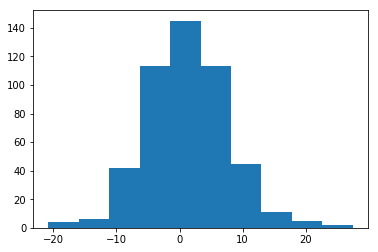

In [13]:
# Assumption 1 - Normality

_ = plt.hist(df_cleaned.Interference_score_ALL)

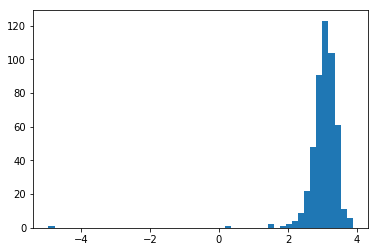

In [14]:
# Assumption 1 - Normality, cont'd

_ = plt.hist(df_cleaned.Interference_score_ALL.apply(lambda x: np.log(x+20.8)), bins=50)

In [15]:
# Assumption #2 - Category Variances

var_CAT1 = np.var(PFS_CAT1_int)
print('Category 1 Variance ' + str(var_CAT1))

var_CAT2 = np.var(PFS_CAT2_int)
print('Category 2 Variance ' + str(var_CAT2))

var_CAT3 = np.var(PFS_CAT3_int)
print('Category 3 Variance ' + str(var_CAT3))

var_CAT4 = np.var(PFS_CAT4_int)
print('Category 4 Variance ' + str(var_CAT4))

var_CAT5 = np.var(PFS_CAT5_int)
print('Category 5 Variance ' + str(var_CAT5))

Category 1 Variance 36.7276288757642
Category 2 Variance 40.89471242092129
Category 3 Variance 53.870182273174194
Category 4 Variance 31.040249851321327
Category 5 Variance 39.07503533466261


The ANOVA condition regarding homogeneity of variances is not robust - the sample variances must be equal. The Levene Test is conducted to test the null hypothesis that all input samples are from populations with equal variances.

In [16]:
stats.levene(PFS_CAT1_int, PFS_CAT2_int, PFS_CAT3_int, PFS_CAT4_int, PFS_CAT5_int)

LeveneResult(statistic=1.6199039767391505, pvalue=0.16798661131019235)

The null hypothesis cannot be rejected for the 0.01 or 0.05 significance levels, making the One-Factor ANOVA an inappropriate test to determine significance. Welch's t-test can be conducted to calculate an alternate F statistic.

In [17]:
# Multiple T-Tests (Welch's Test) for PFS_CAT vs. Interference

# CAT 1 - "Poor"

PFS_CAT1_2 = stats.ttest_ind(PFS_CAT1_int, PFS_CAT2_int, equal_var=False)
print('PFS_CAT1_2 = ' + str(PFS_CAT1_2))

PFS_CAT1_3 = stats.ttest_ind(PFS_CAT1_int, PFS_CAT3_int, equal_var=False)
print('PFS_CAT1_3 = ' + str(PFS_CAT1_3))

PFS_CAT1_4 = stats.ttest_ind(PFS_CAT1_int, PFS_CAT4_int, equal_var=False)
print('PFS_CAT1_4 = ' + str(PFS_CAT1_4))

PFS_CAT1_5 = stats.ttest_ind(PFS_CAT1_int, PFS_CAT5_int, equal_var=False)
print('PFS_CAT1_5 = ' + str(PFS_CAT1_5))

# CAT 2 - "Low Average"

PFS_CAT2_3 = stats.ttest_ind(PFS_CAT2_int, PFS_CAT3_int, equal_var=False)
print('PFS_CAT2_3 = ' + str(PFS_CAT2_3))

PFS_CAT2_4 = stats.ttest_ind(PFS_CAT2_int, PFS_CAT4_int, equal_var=False)
print('PFS_CAT2_4 = ' + str(PFS_CAT2_4))

PFS_CAT2_5 = stats.ttest_ind(PFS_CAT2_int, PFS_CAT5_int, equal_var=False)
print('PFS_CAT2_5 = ' + str(PFS_CAT2_5))

# CAT 3 - "High Average"

PFS_CAT3_4 = stats.ttest_ind(PFS_CAT3_int, PFS_CAT4_int, equal_var=False)
print('PFS_CAT3_4 = ' + str(PFS_CAT3_4))

PFS_CAT3_5 = stats.ttest_ind(PFS_CAT3_int, PFS_CAT5_int, equal_var=False)
print('PFS_CAT3_5 = ' + str(PFS_CAT3_5))

# CAT 4 - "Good"

PFS_CAT4_5 = stats.ttest_ind(PFS_CAT4_int, PFS_CAT5_int, equal_var=False)
print('PFS_CAT4_5 = ' + str(PFS_CAT4_5))

PFS_CAT1_2 = Ttest_indResult(statistic=0.33723405574558907, pvalue=0.7362692543073234)
PFS_CAT1_3 = Ttest_indResult(statistic=-0.6265479533779522, pvalue=0.5315797303500712)
PFS_CAT1_4 = Ttest_indResult(statistic=0.22861483281009928, pvalue=0.8201993431849939)
PFS_CAT1_5 = Ttest_indResult(statistic=1.0951334163998574, pvalue=0.2858926668187994)
PFS_CAT2_3 = Ttest_indResult(statistic=-1.020249062282733, pvalue=0.3086475884977169)
PFS_CAT2_4 = Ttest_indResult(statistic=0.025834392789445687, pvalue=0.9795288847336916)
PFS_CAT2_5 = Ttest_indResult(statistic=0.9737384480166577, pvalue=0.34264295978414083)
PFS_CAT3_4 = Ttest_indResult(statistic=0.665191492226989, pvalue=0.509024764307876)
PFS_CAT3_5 = Ttest_indResult(statistic=1.409018863567933, pvalue=0.17280360321223115)
PFS_CAT4_5 = Ttest_indResult(statistic=0.8186583559970402, pvalue=0.41931309223648006)


Since all p-values > α (0.05), the null hypothesis cannot be rejected. There is no significant difference between the five group means with respect to interference.

...

In [18]:
# PFS_CAT vs. Working Memory

PFS_CAT1_WM = df_cleaned[CAT1].WM_total

PFS_CAT2_WM = df_cleaned[CAT2].WM_total

PFS_CAT3_WM = df_cleaned[CAT3].WM_total

PFS_CAT4_WM = df_cleaned[CAT4].WM_total

PFS_CAT5_WM = df_cleaned[CAT5].WM_total

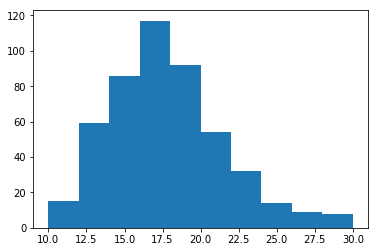

In [19]:
_ = plt.hist(df_cleaned.WM_total)

Though the data is skewed, ANOVA is appropriate as long as variances are equal and the model is balanced.

In [20]:
# Levene Test

stats.levene(PFS_CAT1_WM, PFS_CAT2_WM, PFS_CAT3_WM, PFS_CAT4_WM, PFS_CAT5_WM)

LeveneResult(statistic=0.32159667167382805, pvalue=0.8635202961909922)

In [21]:
# Multiple T-Tests (Welch's Test) for PFS_CAT vs. Working Memory

# CAT 1 - "Poor"

PFS_WM_1_2 = stats.ttest_ind(PFS_CAT1_WM, PFS_CAT2_WM, equal_var=False)
print('PFS_WM_1_2 = ' + str(PFS_WM_1_2))

PFS_WM_1_3 = stats.ttest_ind(PFS_CAT1_WM, PFS_CAT3_WM, equal_var=False)
print('PFS_WM_1_3 = ' + str(PFS_WM_1_3))

PFS_WM_1_4 = stats.ttest_ind(PFS_CAT1_WM, PFS_CAT4_WM, equal_var=False)
print('PFS_WM_1_4 = ' + str(PFS_WM_1_4))

PFS_WM_1_5 = stats.ttest_ind(PFS_CAT1_WM, PFS_CAT5_WM, equal_var=False)
print('PFS_WM_1_5 = ' + str(PFS_WM_1_5))

# CAT 2 - "Low Average"

PFS_WM_2_3 = stats.ttest_ind(PFS_CAT2_WM, PFS_CAT3_WM, equal_var=False)
print('PFS_WM_2_3 = ' + str(PFS_WM_2_3))

PFS_WM_2_4 = stats.ttest_ind(PFS_CAT2_WM, PFS_CAT4_WM, equal_var=False)
print('PFS_WM_2_4 = ' + str(PFS_WM_2_4))

PFS_WM_2_5 = stats.ttest_ind(PFS_CAT2_WM, PFS_CAT5_WM, equal_var=False)
print('PFS_WM_2_5 = ' + str(PFS_WM_2_5))

# CAT 3 - "High Average"

PFS_WM_3_4 = stats.ttest_ind(PFS_CAT3_WM, PFS_CAT4_WM, equal_var=False)
print('PFS_WM_3_4 = ' + str(PFS_WM_3_4))

PFS_WM_3_5 = stats.ttest_ind(PFS_CAT3_WM, PFS_CAT5_WM, equal_var=False)
print('PFS_WM_3_5 = ' + str(PFS_WM_3_5))

# CAT 4 - "Good"

PFS_WM_4_5 = stats.ttest_ind(PFS_CAT4_WM, PFS_CAT5_WM, equal_var=False)
print('PFS_WM_4_5 = ' + str(PFS_WM_4_5))

PFS_WM_1_2 = Ttest_indResult(statistic=1.1056360151088664, pvalue=0.27030156073645284)
PFS_WM_1_3 = Ttest_indResult(statistic=0.1487732865163074, pvalue=0.8818692471625802)
PFS_WM_1_4 = Ttest_indResult(statistic=1.1336316774989315, pvalue=0.26356736723146984)
PFS_WM_1_5 = Ttest_indResult(statistic=-0.09416137199983304, pvalue=0.9259152826659935)
PFS_WM_2_3 = Ttest_indResult(statistic=-1.0102956931108242, pvalue=0.3133453366152576)
PFS_WM_2_4 = Ttest_indResult(statistic=0.5947784399111334, pvalue=0.5561262766873664)
PFS_WM_2_5 = Ttest_indResult(statistic=-0.5417971563145056, pvalue=0.5947565239181918)
PFS_WM_3_4 = Ttest_indResult(statistic=1.066319729190738, pvalue=0.2930015388459206)
PFS_WM_3_5 = Ttest_indResult(statistic=-0.16150080342297568, pvalue=0.8733830790268036)
PFS_WM_4_5 = Ttest_indResult(statistic=-0.813065243256788, pvalue=0.42227564015922747)


The null hypothesis cannot be rejected - there is no significant difference between the five group means with respect to working memory.

...

In [22]:
# PFS_CAT vs. Cognitive Flexibility

PFS_CAT1_CF = df_cleaned[CAT1].CF_total

PFS_CAT2_CF = df_cleaned[CAT2].CF_total

PFS_CAT3_CF = df_cleaned[CAT3].CF_total

PFS_CAT4_CF = df_cleaned[CAT4].CF_total

PFS_CAT5_CF = df_cleaned[CAT5].CF_total

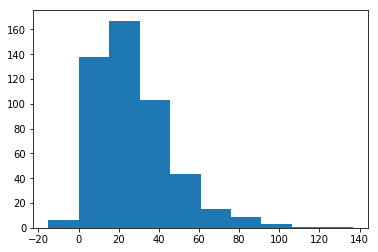

In [23]:
# Assumption 1 - Normality

_ = plt.hist(df_cleaned.CF_total)

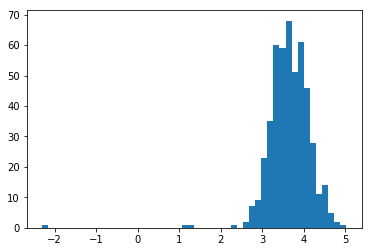

In [24]:
# Assumption 1 - Normality, cont'd

_ = plt.hist(df_cleaned.CF_total.apply(lambda x: np.log(x+15.1)), bins=50)

In [25]:
# Levene Test

stats.levene(PFS_CAT1_CF, PFS_CAT2_CF, PFS_CAT3_CF, PFS_CAT4_CF, PFS_CAT5_CF)

LeveneResult(statistic=0.1475342814326341, pvalue=0.9640585052702206)

In [26]:
# Multiple T-Tests (Welch's Test) for PFS_CAT vs. Cognitive Flexibility

# CAT 1 - "Poor"

PFS_CF_1_2 = stats.ttest_ind(PFS_CAT1_CF, PFS_CAT2_CF, equal_var=False)
print('PFS_CF_1_2 = ' + str(PFS_CF_1_2))

PFS_CF_1_3 = stats.ttest_ind(PFS_CAT1_CF, PFS_CAT3_CF, equal_var=False)
print('PFS_CF_1_3 = ' + str(PFS_CF_1_3))

PFS_CF_1_4 = stats.ttest_ind(PFS_CAT1_CF, PFS_CAT4_CF, equal_var=False)
print('PFS_CF_1_4 = ' + str(PFS_CF_1_4))

PFS_CF_1_5 = stats.ttest_ind(PFS_CAT1_CF, PFS_CAT5_CF, equal_var=False)
print('PFS_CF_1_5 = ' + str(PFS_CF_1_5))

# CAT 2 - "Low Average"

PFS_CF_2_3 = stats.ttest_ind(PFS_CAT2_CF, PFS_CAT3_CF, equal_var=False)
print('PFS_CF_2_3 = ' + str(PFS_CF_2_3))

PFS_CF_2_4 = stats.ttest_ind(PFS_CAT2_CF, PFS_CAT4_CF, equal_var=False)
print('PFS_CF_2_4 = ' + str(PFS_CF_2_4))

PFS_CF_2_5 = stats.ttest_ind(PFS_CAT2_CF, PFS_CAT5_CF, equal_var=False)
print('PFS_CF_2_5 = ' + str(PFS_CF_2_5))

# CAT 3 - "High Average"

PFS_CF_3_4 = stats.ttest_ind(PFS_CAT3_CF, PFS_CAT4_CF, equal_var=False)
print('PFS_CF_3_4 = ' + str(PFS_CF_3_4))

PFS_CF_3_5 = stats.ttest_ind(PFS_CAT3_CF, PFS_CAT5_CF, equal_var=False)
print('PFS_CF_3_5 = ' + str(PFS_CF_3_5))

# CAT 4 - "Good"

PFS_CF_4_5 = stats.ttest_ind(PFS_CAT4_CF, PFS_CAT5_CF, equal_var=False)
print('PFS_CF_4_5 = ' + str(PFS_CF_4_5))

PFS_CF_1_2 = Ttest_indResult(statistic=0.13513850657476428, pvalue=0.892654562579936)
PFS_CF_1_3 = Ttest_indResult(statistic=-0.12139343748250023, pvalue=0.9034902685622774)
PFS_CF_1_4 = Ttest_indResult(statistic=0.3041332884746812, pvalue=0.762211036564538)
PFS_CF_1_5 = Ttest_indResult(statistic=-1.6258187960865955, pvalue=0.11583218490285127)
PFS_CF_2_3 = Ttest_indResult(statistic=-0.29644094931377624, pvalue=0.7671566219878602)
PFS_CF_2_4 = Ttest_indResult(statistic=0.24216088895216992, pvalue=0.8100279304367719)
PFS_CF_2_5 = Ttest_indResult(statistic=-1.8410779824064492, pvalue=0.08084640983146331)
PFS_CF_3_4 = Ttest_indResult(statistic=0.4061783923211164, pvalue=0.6863983531198868)
PFS_CF_3_5 = Ttest_indResult(statistic=-1.5814513355037416, pvalue=0.1266296625199668)
PFS_CF_4_5 = Ttest_indResult(statistic=-1.662642605741499, pvalue=0.10524868990645395)


The null hypothesis cannot be rejected - there is no significant difference between the five group means with respect to cognitive flexiblity.

# ...

**PA_CAT vs. EF Scores (3)**

- Interference

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

- Working Memory

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

- Cognitive Flexibilty

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

α = 0.05

In [27]:
# PA_CAT vs. Interference

PA_CAT1 = (df_cleaned['PA_CAT']==1)
PA_CAT1_int = df_cleaned[PA_CAT1].Interference_score_ALL

PA_CAT2 = (df_cleaned['PA_CAT']==2)
PA_CAT2_int = df_cleaned[PA_CAT2].Interference_score_ALL

PA_CAT3 = (df_cleaned['PA_CAT']==3)
PA_CAT3_int = df_cleaned[PA_CAT3].Interference_score_ALL

In [28]:
# Levene Test

stats.levene(PA_CAT1_int, PA_CAT2_int, PA_CAT3_int)

LeveneResult(statistic=0.9023555550335898, pvalue=0.40629575092410475)

In [29]:
# Multiple T-Tests (Welch's Test) for PA_CAT vs. Interference

# CAT 1 - "Low Level"

PA_CAT_1_2 = stats.ttest_ind(PA_CAT1_int, PA_CAT2_int, equal_var=False)
print('PA_CAT_1_2 = ' + str(PA_CAT_1_2))

PA_CAT_1_3 = stats.ttest_ind(PA_CAT1_int, PA_CAT3_int, equal_var=False)
print('PA_CAT_1_3 = ' + str(PA_CAT_1_3))


# CAT 2 - "Low Average"

PA_CAT_2_3 = stats.ttest_ind(PA_CAT2_int, PA_CAT3_int, equal_var=False)
print('PA_CAT_2_3 = ' + str(PA_CAT_2_3))

PA_CAT_1_2 = Ttest_indResult(statistic=0.045513048490437316, pvalue=0.963721077338835)
PA_CAT_1_3 = Ttest_indResult(statistic=1.4238081623724677, pvalue=0.16362828626281364)
PA_CAT_2_3 = Ttest_indResult(statistic=1.4281601175600154, pvalue=0.16295800509791308)


The null hypothesis cannot be rejected - there is no significant difference between the three group means with respect to interference.

# ...

In [30]:
# PA_CAT vs. Working Memory

PA_CAT1_WM = df_cleaned[PA_CAT1].WM_total

PA_CAT2_WM = df_cleaned[PA_CAT2].WM_total

PA_CAT3_WM = df_cleaned[PA_CAT3].WM_total

In [31]:
# Levene Test

stats.levene(PA_CAT1_WM, PA_CAT2_WM, PA_CAT3_WM)

LeveneResult(statistic=0.6155346481117017, pvalue=0.5407752386453477)

In [32]:
# Multiple T-Tests (Welch's Test) for PA_CAT vs. Working Memory

# CAT 1 - "Low Level"

PA_WM_1_2 = stats.ttest_ind(PA_CAT1_WM, PA_CAT2_WM, equal_var=False)
print('PA_WM_1_2 = ' + str(PA_WM_1_2))

PA_WM_1_3 = stats.ttest_ind(PA_CAT1_WM, PA_CAT3_WM, equal_var=False)
print('PA_WM_1_3 = ' + str(PA_WM_1_3))


# CAT 2 - "Low Average"

PA_WM_2_3 = stats.ttest_ind(PA_CAT2_WM, PA_CAT3_WM, equal_var=False)
print('PA_WM_2_3 = ' + str(PA_WM_2_3))

PA_WM_1_2 = Ttest_indResult(statistic=1.0435542225053047, pvalue=0.2973351509616305)
PA_WM_1_3 = Ttest_indResult(statistic=-1.4016187337166315, pvalue=0.1697628460422337)
PA_WM_2_3 = Ttest_indResult(statistic=-1.8827185765051275, pvalue=0.06872184976594055)


The null hypothesis cannot be rejected - there is no significant difference between the three group means with respect to working memory.

...

In [33]:
# PA_CAT vs. Cognitive Flexibility

PA_CAT1_CF = df_cleaned[PA_CAT1].CF_total

PA_CAT2_CF = df_cleaned[PA_CAT2].CF_total

PA_CAT3_CF = df_cleaned[PA_CAT3].CF_total

In [34]:
# Levene Test

stats.levene(PA_CAT1_CF, PA_CAT2_CF, PA_CAT3_CF)

LeveneResult(statistic=0.37440260041032986, pvalue=0.687899396435361)

In [35]:
# Multiple T-Tests (Welch's Test) for PA_CAT vs. Cognitive Flexibility

# CAT 1 - "Low Level"

PA_CF_1_2 = stats.ttest_ind(PA_CAT1_CF, PA_CAT2_CF, equal_var=False)
print('PA_CF_1_2 = ' + str(PA_CF_1_2))

PA_CF_1_3 = stats.ttest_ind(PA_CAT1_CF, PA_CAT3_CF, equal_var=False)
print('PA_CF_1_3 = ' + str(PA_CF_1_3))


# CAT 2 - "Low Average"

PA_CF_2_3 = stats.ttest_ind(PA_CAT2_CF, PA_CAT3_CF, equal_var=False)
print('PA_CF_2_3 = ' + str(PA_CF_2_3))

PA_CF_1_2 = Ttest_indResult(statistic=-1.9265361444167999, pvalue=0.05470507776836398)
PA_CF_1_3 = Ttest_indResult(statistic=-0.9443358591034609, pvalue=0.35114165022958077)
PA_CF_2_3 = Ttest_indResult(statistic=-0.0070467959870727775, pvalue=0.9944172821119242)


The null hypothesis cannot be rejected - there is no significant difference between the three group means with respect to cognitive flexilibility.

**Income Category vs. EF Scores (3)**

- Interference

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

- Working Memory

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

- Cognitive Flexibilty

$H_{o}$: $μ_{1}$ = $μ_{2}$ = $μ_{3}$

$H_{a}$: At least one inequality exists between the means 

α = 0.05

In [36]:
# Income_CAT vs. Interference

INC_CAT1 = (df_cleaned['Income_CAT']==1)
INC_CAT1_int = df_cleaned[INC_CAT1].Interference_score_ALL

INC_CAT2 = (df_cleaned['Income_CAT']==2)
INC_CAT2_int = df_cleaned[INC_CAT2].Interference_score_ALL

INC_CAT3 = (df_cleaned['Income_CAT']==3)
INC_CAT3_int = df_cleaned[INC_CAT3].Interference_score_ALL

In [37]:
# Levene Test

stats.levene(INC_CAT1_int, INC_CAT2_int, INC_CAT3_int)

LeveneResult(statistic=0.2309361515390163, pvalue=0.7938777437762871)

In [38]:
# Multiple T-Tests (Welch's Test) for Income_CAT vs. Interference

# CAT 1 - RM < 2300

INC_CAT_1_2 = stats.ttest_ind(INC_CAT1_int, INC_CAT2_int, equal_var=False)
print('INC_CAT_1_2 = ' + str(INC_CAT_1_2))

INC_CAT_1_3 = stats.ttest_ind(INC_CAT1_int, INC_CAT3_int, equal_var=False)
print('INC_CAT_1_3 = ' + str(INC_CAT_1_3))


# CAT 2 - "2300 - RM - 5599"

INC_CAT_2_3 = stats.ttest_ind(INC_CAT2_int, INC_CAT3_int, equal_var=False)
print('INC_CAT_2_3 = ' + str(INC_CAT_2_3))

INC_CAT_1_2 = Ttest_indResult(statistic=-0.8637930134838726, pvalue=0.38831061318183946)
INC_CAT_1_3 = Ttest_indResult(statistic=-1.9948485792545718, pvalue=0.047049241489114685)
INC_CAT_2_3 = Ttest_indResult(statistic=-1.1475711548775827, pvalue=0.2521244363467227)


The null hypothesis cannot be rejected for Categories 1&2 and 2&3 - there is no significant difference between the means with respect to interference.

The null hypothesis can be rejected for Category 1&3 - there is a significant difference between the means of Category 1 and Category 3 regarding interference. 

...

In [39]:
# Income_CAT vs. Working Memory

INC_CAT1_WM = df_cleaned[INC_CAT1].WM_total

INC_CAT2_WM = df_cleaned[INC_CAT2].WM_total

INC_CAT3_WM = df_cleaned[INC_CAT3].WM_total

In [40]:
# Levene Test

stats.levene(INC_CAT1_WM, INC_CAT2_WM, INC_CAT3_WM)

LeveneResult(statistic=3.583679586766644, pvalue=0.028514282531479387)

The variances are equal. As such, ANOVA can be performed on this sample. 

In [41]:
# Assumption #3 - Random Samples

Income_1 = np.random.choice(INC_CAT1_WM, size=450)
Income_2 = np.random.choice(INC_CAT2_WM, size=450)
Income_3 = np.random.choice(INC_CAT3_WM, size=450)

# One-Factor ANOVA Test - (Income_CAT vs. Working Memory)

stats.f_oneway(Income_1, Income_2, Income_3)

F_onewayResult(statistic=22.747426873493414, pvalue=1.9234766198514318e-10)

The null hypothesis can be rejected for the null, which states that at least one inequality exists between the means with respect to working memory. The Tukey Test must now be employed to determine the differences. 

In [42]:
# Tukey Test - Income_CAT vs. Working Memory

from statsmodels.stats.multicomp import pairwise_tukeyhsd

income_tukey = pairwise_tukeyhsd(df_cleaned['WM_total'], df_cleaned['Income_CAT'])
print(income_tukey)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
 1.0    2.0    0.879   -0.0527 1.8106 False 
 1.0    3.0    1.676    0.6902 2.6618  True 
 2.0    3.0    0.7971  -0.2183 1.8124 False 
--------------------------------------------


The null hypothesis can only be rejected for the comparison between Categories 1&3. This allows for the conclusion that there is a significant difference in mean working memory scores between students from low-income and high-income backgrounds. 

...

In [43]:
# Income_CAT vs. Cognitive Flexibility

INC_CAT1_CF = df_cleaned[INC_CAT1].CF_total

INC_CAT2_CF = df_cleaned[INC_CAT2].CF_total

INC_CAT3_CF = df_cleaned[INC_CAT3].CF_total

In [44]:
# Levene Test

stats.levene(INC_CAT1_CF, INC_CAT2_CF, INC_CAT3_CF)

LeveneResult(statistic=4.196902616451289, pvalue=0.015594269095078394)

The variances are equal. As such, ANOVA can be performed on this sample.

In [45]:
# Assumption #3 - Random Samples

Income_1_CF = np.random.choice(INC_CAT1_CF, size=450)
Income_2_CF = np.random.choice(INC_CAT2_CF, size=450)
Income_3_CF = np.random.choice(INC_CAT3_CF, size=450)

# One-Factor ANOVA Test - (Income_CAT vs. Cognitive Flexibility)

stats.f_oneway(Income_1_CF, Income_2_CF, Income_3_CF)

F_onewayResult(statistic=0.9526791384150386, pvalue=0.38596600577096685)

The null hypothesis cannot be rejected - there is no significant difference between the three group means with respect to cognitive flexibility.

# ...

**Age vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between age and interference.  

$H_{a}$: There is a significant correlation between age and interference.

- Working Memory

$H_{o}$: There is no significant correlation between age and working memory.  

$H_{a}$: There is a significant correlation between age and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between age and cognitive flexibility.  

$H_{a}$: There is a significant correlation between age and cognitive flexibility.

α = 0.05

In [46]:
# Age vs. Interference

age_df = df_cleaned['Actual_age_C']
interference = df_cleaned['Interference_score_ALL']

r1, p1 = stats.pearsonr(age_df, interference)
print(r1, p1)

# Age vs. Working Memory

working_memory = df_cleaned['WM_total']

r2, p2 = stats.pearsonr(age_df, working_memory)
print(r2, p2)

# Age vs. Cognitive Flexibility

cog_flex = df_cleaned['CF_total']

r3, p3 = stats.pearsonr(age_df, cog_flex)
print(r3, p3)

0.02883339938492646 0.5259900644790236
0.054461688551879446 0.2307504350815389
-0.14615595040919882 0.0012329849814981715


There is a significant negative correlation between age and cognitive flexibility. 

**Weight vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between weight and interference.  

$H_{a}$: There is a significant correlation between weight and interference.

- Working Memory

$H_{o}$: There is no significant correlation between weight and working memory.  

$H_{a}$: There is a significant correlation between weight and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between weight and cognitive flexibility.  

$H_{a}$: There is a significant correlation between weight and cognitive flexibility.

α = 0.05

In [47]:
# Weight vs. Interference

weight_df = df_cleaned['Weight']

r1, p1 = stats.pearsonr(weight_df, interference)
print(r1, p1)

# Weight vs. Working Memory

r2, p2 = stats.pearsonr(weight_df, working_memory)
print(r2, p2)

# Weight vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(weight_df, cog_flex)
print(r3, p3)

-0.05197570015694715 0.2527696260488067
-0.02857035484040373 0.5297736978694546
-0.002099492157635246 0.9631787174209964


There is no significant correlation between weight and executive function. 

**BMI vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between BMI and interference.  

$H_{a}$: There is a significant correlation between BMI and interference.

- Working Memory

$H_{o}$: There is no significant correlation between BMI and working memory.  

$H_{a}$: There is a significant correlation between BMI and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between BMI and cognitive flexibility.  

$H_{a}$: There is a significant correlation between BMI and cognitive flexibility.

α = 0.05

In [48]:
# BMI vs. Interference

BMI_df = df_cleaned['BMI']

r1, p1 = stats.pearsonr(BMI_df, interference)
print(r1, p1)

# BMI vs. Working Memory

r2, p2 = stats.pearsonr(BMI_df, working_memory)
print(r2, p2)

# BMI vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(BMI_df, cog_flex)
print(r3, p3)

-0.08440781558824864 0.06298005442713729
-0.07047840888612275 0.12074496541805409
0.00737987624254447 0.8710887915789404


There is no significant correlation between BMI and executive function.

**BMI-for-Age vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between BMI-for-Age and interference.  

$H_{a}$: There is a significant correlation between BMI-for-Age and interference.

- Working Memory

$H_{o}$: There is no significant correlation between BMI-for-Age and working memory.  

$H_{a}$: There is a significant correlation between BMI-for-Age and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between BMI-for-Age and cognitive flexibility.  

$H_{a}$: There is a significant correlation between BMI-for-Age and cognitive flexibility.

α = 0.05

In [49]:
# BMI-for-Age vs. Interference

BMI_for_Age = df_cleaned['BMI_for_age']

r1, p1 = stats.pearsonr(BMI_for_Age, interference)
print(r1, p1)

# BMI-for-Age vs. Working Memory

r2, p2 = stats.pearsonr(BMI_for_Age, working_memory)
print(r2, p2)

# BMI-for-Age vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(BMI_for_Age, cog_flex)
print(r3, p3)

-0.08939871365079644 0.04887259218707688
-0.09413478764238381 0.03803249502534941
0.03854247348316013 0.39654290240901746


There is a significant negative correlation between BMI-for-age and interference, as well as BMI-for-age and working memory. The correlation between BMI-for-age and cognitive flexibility is insignificant. 

**Physical Fitness Score vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between Physical Fitness Score and interference.  

$H_{a}$: There is a significant correlation between Physical Fitness Score and interference.

- Working Memory

$H_{o}$: There is no significant correlation between Physical Fitness Score and working memory.  

$H_{a}$: There is a significant correlation between Physical Fitness Score and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between Physical Fitness Score and cognitive flexibility.  

$H_{a}$: There is a significant correlation between Physical Fitness Score and cognitive flexibility.

α = 0.05

In [50]:
# Physical Fitness Score vs. Interference

PFS_score = df_cleaned['Physical_fitness_score']

r1, p1 = stats.pearsonr(PFS_score, interference)
print(r1, p1)

# Physical Fitness Score vs. Working Memory

r2, p2 = stats.pearsonr(PFS_score, working_memory)
print(r2, p2)

# Physical Fitness Score vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(PFS_score, cog_flex)
print(r3, p3)

0.022730683286735245 0.6171585989708871
-0.009479946844289837 0.8348730783764182
0.06932231412144733 0.1269750639641181


There is no significant correlation between physical fitness scores and executive function. 

**Physical Activity Score vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between Physical Activity Score and interference.  

$H_{a}$: There is a significant correlation between Physical Activity Score and interference.

- Working Memory

$H_{o}$: There is no significant correlation between Physical Activity Score and working memory.  

$H_{a}$: There is a significant correlation between Physical Activity Score and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between Physical Activity Score and cognitive flexibility.  

$H_{a}$: There is a significant correlation between Physical Activity Score and cognitive flexibility.

α = 0.05

In [51]:
# Physical Activity Score vs. Interference

PA_total = df_cleaned['PA_total_score']

r1, p1 = stats.pearsonr(PA_total, interference)
print(r1, p1)

# Physical Activity Score vs. Working Memory

r2, p2 = stats.pearsonr(PA_total, working_memory)
print(r2, p2)

# Physical Activity Score vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(PA_total, cog_flex)
print(r3, p3)

-0.055476183163104084 0.22216703200603152
0.04303519334141155 0.34377943944451206
0.07125551928683523 0.11669301999911685


There is no significant correlation between physical activity scores and executive function.

**Sleep Percent vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between Sleep Percent and interference.  

$H_{a}$: There is a significant correlation between Sleep Percent and interference.

- Working Memory

$H_{o}$: There is no significant correlation between Sleep Percent and working memory.  

$H_{a}$: There is a significant correlation between Sleep Percent and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between Sleep Percent and cognitive flexibility.  

$H_{a}$: There is a significant correlation between Sleep Percent and cognitive flexibility.

α = 0.05

In [52]:
# Sleep Percent vs. Interference

sleep_percent = df_cleaned['Sleep_percent']

r1, p1 = stats.pearsonr(sleep_percent, interference)
print(r1, p1)

# Sleep Percent vs. Working Memory

r2, p2 = stats.pearsonr(sleep_percent, working_memory)
print(r2, p2)

# Sleep Percent vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(sleep_percent, cog_flex)
print(r3, p3)

0.11011667044500599 0.01515282853876919
0.09185590109230125 0.04296324929047715
-0.05706052295913128 0.2092223939482554


There is a significant positive correlation between sleep percent and interference, as well as sleep percent and working memory. 

**Household Size vs. EF Scores**

- Interference

$H_{o}$: There is no significant correlation between household size and interference.  

$H_{a}$: There is a significant correlation between household size and interference.

- Working Memory

$H_{o}$: There is no significant correlation between household size and working memory.  

$H_{a}$: There is a significant correlation between household size and working memory.

- Cognitive Flexibilty

$H_{o}$: There is no significant correlation between household size and cognitive flexibility.  

$H_{a}$: There is a significant correlation between household size and cognitive flexibility.

α = 0.05

In [53]:
# Household Size vs. Interference

household_size = df_cleaned['Household_size']

r1, p1 = stats.pearsonr(household_size, interference)
print(r1, p1)

# Household Size vs. Working Memory

r2, p2 = stats.pearsonr(household_size, working_memory)
print(r2, p2)

# Household Size vs. Cognitive Flexibility

r3, p3 = stats.pearsonr(household_size, cog_flex)
print(r3, p3)

-0.04195222799263026 0.35607039457907286
-0.09805274432920359 0.030675513175410597
0.08252504843466325 0.06910769439161386


There is a significant negative correlation between household size and working memory. 